In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

In [ ]:
# Task №1

In [2]:
def generate_adj_matrix(E = 200, V = 100):

  adj_mat = np.zeros([V,V])

  el_id = np.arange(V * V)
  sequence = []

  for i in range(V):
    for j in range(1 + i, V):
      sequence.append(el_id[i * V + j])

  connections = random.sample(sequence, k = E)

  for i in connections:
    adj_mat[i // V][i % V] = 1
    adj_mat[i % V][i // V] = 1

  return adj_mat

In [3]:
def transfer_to_adj_list(adj_mat):

  adj_list = []

  for array in adj_mat:

    connections = []

    for j in range(len(adj_mat)):
      if array[j] == 1:
        connections.append(j)

    adj_list.append(connections)

  return adj_list

In [4]:
def visualize_graph(adj_mat):

  G = nx.from_numpy_matrix(np.matrix(adj_mat), create_using=nx.MultiGraph)
  nx.draw(G, with_labels=True, alpha=0.6, node_shape='o')
  plt.show()

In [5]:
# Task №2

In [6]:
class Queue():

  def __init__(self):
    self.queue = []

  def add(self, element):
    self.queue.append(element)

  def remove(self):
    self.queue.pop(0)

  def show(self):
    print(self.queue)

In [7]:
def BFS(adj_list, s):  #s - starting node

  nodes = {}  #0-distance, 1-color, 2-predecessor, 3-path

  for i in range(len(adj_list)):

    nodes[i] = [0, 'white', None, [s]]

  nodes[s][1] = 'gray'

  queue = Queue()
  queue.add(s)

  while len(queue.queue) != 0:

    u = queue.queue[0]  #u-current node
    queue.remove()

    for v in adj_list[u]:

      if nodes[v][1] == 'white':

        nodes[v][1] = 'gray'
        nodes[v][0] = nodes[u][0] + 1
        nodes[v][2] = u
        nodes[v][3] = nodes[u][3].copy()
        nodes[v][3].append(v)

        queue.add(v)

    nodes[u][1] = 'black'

  return nodes

In [8]:
def DFS(adj_list):

  path = []
  
  nodes = {}  #0-open time, 1-color, 2-predecessor

  for i in range(len(adj_list)):

    nodes[i] = [0, 'white', None]


  time = -1  #Won't be used for the "close" time, onle for "open"


  def DFS_visit(u, time):

    time += 1
    nodes[u][0] = time
    nodes[u][1] = 'gray'
    path.append(u)

    for v in adj_list[u]:

      if nodes[v][1] == 'white':

        nodes[v][2] = u
        DFS_visit(v, time)

    nodes[u][1] = 'black'
    time += 1


  for u in nodes:

    if nodes[u][1] == 'white':

      DFS_visit(u, time)

  return path, nodes

In [9]:
adj_mat = generate_adj_matrix()
adj_mat

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [10]:
adj_list = transfer_to_adj_list(adj_mat)
adj_list

[[1, 92, 93, 96],
 [0, 24, 72, 80],
 [3, 10, 12, 15, 19, 93, 99],
 [2, 11, 13, 17, 20, 42, 70, 82, 90, 99],
 [11, 56, 68, 74, 95, 98],
 [15, 33, 68],
 [7, 43, 87],
 [6, 39, 66],
 [60],
 [25],
 [2, 12, 57],
 [3, 4, 28, 42, 51],
 [2, 10, 17, 35, 39, 60, 88, 98],
 [3, 42, 43, 46, 92],
 [18, 34, 61, 80],
 [2, 5, 18, 38, 76],
 [29, 34, 40, 57, 62],
 [3, 12, 53, 62, 89],
 [14, 15, 49, 53],
 [2, 23, 29, 55, 68, 83, 93],
 [3, 23, 29, 63],
 [23, 44],
 [25, 26, 31, 69, 76],
 [19, 20, 21, 30, 40, 59, 74],
 [1, 86],
 [9, 22, 49, 96],
 [22, 32, 60],
 [35, 63, 96],
 [11, 40, 59, 64, 93],
 [16, 19, 20, 30, 40, 67],
 [23, 29, 47, 58],
 [22, 39],
 [26],
 [5, 45, 74, 77, 87],
 [14, 16, 36, 54, 80],
 [12, 27, 46],
 [34, 46],
 [49, 74],
 [15, 44, 74, 76],
 [7, 12, 31, 78, 85, 94, 99],
 [16, 23, 28, 29, 65, 88, 96],
 [44, 50, 81, 93],
 [3, 11, 13],
 [6, 13, 58],
 [21, 38, 41, 61, 76, 99],
 [33, 92],
 [13, 35, 36],
 [30, 48, 50],
 [47, 68, 71, 76, 93, 97, 98],
 [18, 25, 37, 58, 62],
 [41, 47, 53, 69],
 [11,

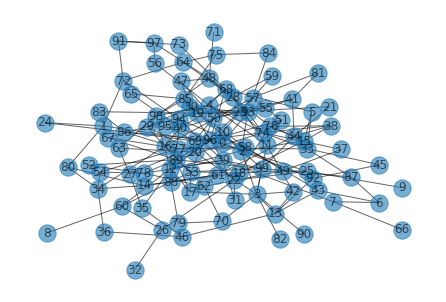

In [11]:
visualize_graph(adj_mat)

In [12]:
BFS(adj_list, 0)  #0-distance, 1-color, 2-predecessor, 3-path

{0: [0, 'black', None, [0]],
 1: [1, 'black', 0, [0, 1]],
 2: [2, 'black', 93, [0, 93, 2]],
 3: [3, 'black', 13, [0, 92, 13, 3]],
 4: [3, 'black', 74, [0, 93, 74, 4]],
 5: [3, 'black', 68, [0, 96, 68, 5]],
 6: [4, 'black', 43, [0, 92, 13, 43, 6]],
 7: [5, 'black', 39, [0, 1, 72, 94, 39, 7]],
 8: [5, 'black', 60, [0, 93, 2, 12, 60, 8]],
 9: [3, 'black', 25, [0, 96, 25, 9]],
 10: [3, 'black', 2, [0, 93, 2, 10]],
 11: [3, 'black', 28, [0, 93, 28, 11]],
 12: [3, 'black', 2, [0, 93, 2, 12]],
 13: [2, 'black', 92, [0, 92, 13]],
 14: [3, 'black', 80, [0, 1, 80, 14]],
 15: [3, 'black', 2, [0, 93, 2, 15]],
 16: [3, 'black', 40, [0, 96, 40, 16]],
 17: [3, 'black', 89, [0, 96, 89, 17]],
 18: [4, 'black', 14, [0, 1, 80, 14, 18]],
 19: [2, 'black', 93, [0, 93, 19]],
 20: [4, 'black', 3, [0, 92, 13, 3, 20]],
 21: [4, 'black', 23, [0, 93, 19, 23, 21]],
 22: [3, 'black', 25, [0, 96, 25, 22]],
 23: [3, 'black', 19, [0, 93, 19, 23]],
 24: [2, 'black', 1, [0, 1, 24]],
 25: [2, 'black', 96, [0, 96, 25]],


In [13]:
np.array(DFS(adj_list)[0])

array([ 0,  1, 24, 86, 69, 22, 25,  9, 49, 18, 14, 34, 16, 29, 19,  2,  3,
       11,  4, 56, 97, 48, 47, 30, 23, 20, 63, 27, 35, 12, 10, 57, 51, 74,
       33,  5, 15, 38, 44, 21, 41, 50, 53, 17, 62, 61, 88, 40, 28, 59, 64,
       72, 91, 73, 68, 96, 89, 52, 78, 39,  7,  6, 43, 13, 42, 46, 36, 92,
       45, 58, 77, 54, 67, 94, 87, 99, 66, 31, 85, 65, 75, 84, 98, 93, 55,
       79, 70, 60,  8, 26, 32, 81, 76, 37, 71, 95, 82, 90, 83, 80])